In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import nltk
warnings.filterwarnings("ignore")

In [2]:
#Import Data
EMTweet=pd.read_csv('/content/Elon_musk.csv',encoding='latin1')
EMTweet


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


**EDA**

In [3]:
EMTweet.drop(['Unnamed: 0'],inplace=True ,axis=1)
EMTweet

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
EMTweet=EMTweet.rename(columns ={'Text': 'Tweet'}, inplace= False)
EMTweet

,Tweet
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
EMTweet.isnull().sum()

Tweet    0
dtype: int64

In [6]:
EMTweet.describe()

,Tweet
count,1999
unique,1997
top,The most entertaining outcome is the most likely
freq,2


**Data Exploration**

<function matplotlib.pyplot.show(close=None, block=None)>

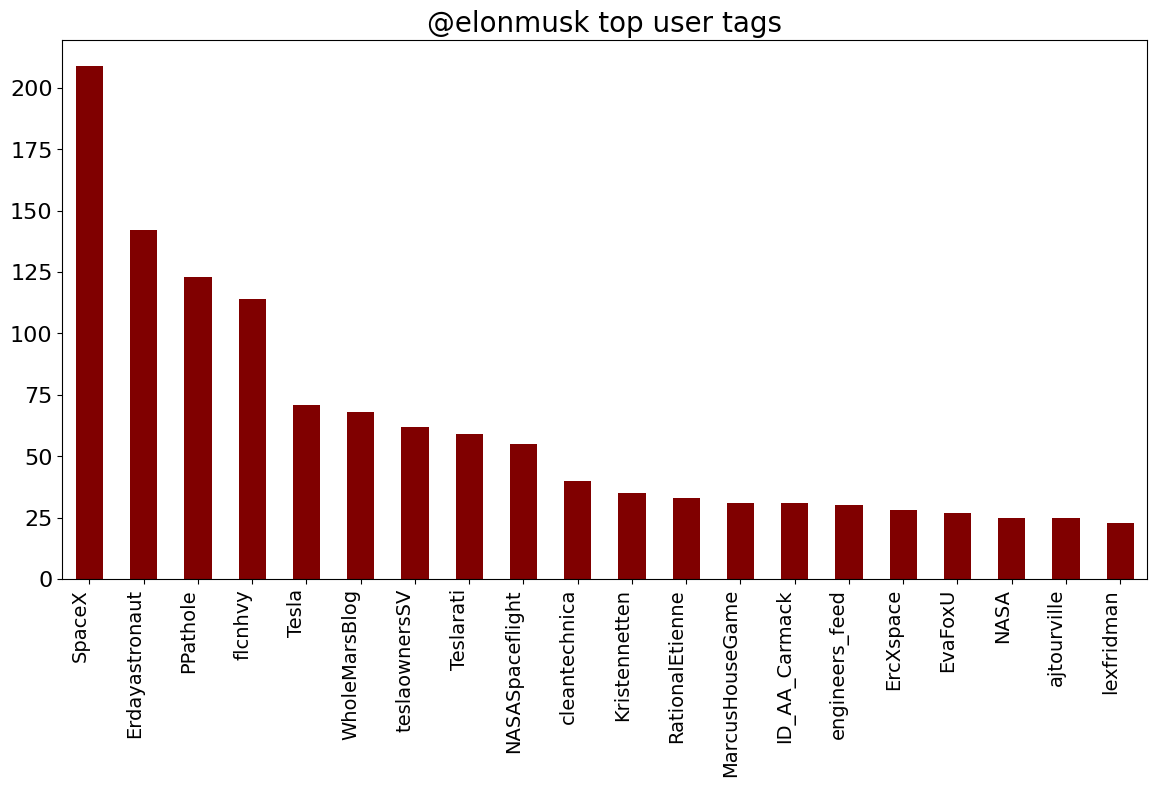

In [7]:
from matplotlib.transforms import DEBUG
import itertools

DE = list(itertools.chain(*EMTweet.Tweet.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
    if '@' in handle.replace(":", "")]).tolist()))

pd.Series(DE).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='maroon')
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=14)
plt.show

**Basic Text Processing**

In [8]:
#Cleaning the text by Removing irrelevant information
import re      #its uses for regular expression
import string

def clean_text(text):
   # '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

# Clean The Text
EMTweet["Tweet"] = EMTweet["Tweet"].apply(clean_text)
EMTweet.head()

,Tweet
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...


In [9]:
#Word frequency
Freq = pd.Series(' '.join(EMTweet['Tweet']).split()).value_counts()[:40] # for top 40
Freq

the               486
to                400
a                 355
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
ppathole          123
i                 117
flcnhvy           114
with              107
are               100
at                 93
you                90
yes                86
and                84
not                77
great              76
have               74
was                74
as                 73
teslaownerssv      73
from               72
wholemarsblog      68
so                 66
just               64
no                 62
dtype: int64

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
EMTweet['Tweet'] = EMTweet['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
#word frequency after removal of stopwords
freq_SW = pd.Series(' '.join(EMTweet['Tweet']).split()).value_counts()[:40] # for top 40
freq_SW

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
its                56
haha                55
nasaspaceflight     55
good                51
launch              49
sure                43
yeah                41
would               40
much                40
cleantechnica       40
one                 39
first               39
like                38
probably            35
kristennetten       35
true                35
rationaletienne     33
also                33
make                33
new                 32
dragon              32
need                31
people              31
marcushousegame     31
idaacarmack         31
spacestation        30
nasa                30
maybe               30
dtype: int64

**Basic Feature Extraction**

In [12]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(EMTweet["Tweet"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(11)

,term,occurrences,frequency
0,aber,1,0.000075
1,able,6,0.000449
2,abo,1,0.000075
3,aboard,1,0.000075
4,abort,3,0.000224
5,absence,1,0.000075
6,absolute,1,0.000075
7,absolutely,15,0.001121
8,absorb,1,0.000075
9,absorption,1,0.000075


In [13]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(EMTweet["Tweet"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yahoofinance,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.356779,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**N gram**

***Bi-gram***

In [14]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),     #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [15]:
top2_words = get_top_n2_words(EMTweet["Tweet"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,rt spacex,71
1,we re,26
2,spacex falcon,17
3,erdayastronaut spacex,16
4,crew dragon,13


[Text(0, 0, 'rt spacex'),
 Text(1, 0, 'we re'),
 Text(2, 0, 'spacex falcon'),
 Text(3, 0, 'erdayastronaut spacex'),
 Text(4, 0, 'crew dragon'),
 Text(5, 0, 'pretty much'),
 Text(6, 0, 'rt nasa'),
 Text(7, 0, 'waemd spacex'),
 Text(8, 0, 'you re'),
 Text(9, 0, 'giga berlin'),
 Text(10, 0, 'first stage'),
 Text(11, 0, 'teslaratiteam teslarati'),
 Text(12, 0, 'nasa spacex'),
 Text(13, 0, 'falcon first'),
 Text(14, 0, 'next week'),
 Text(15, 0, 'erdayastronaut flcnhvy'),
 Text(16, 0, 'they re'),
 Text(17, 0, 'flcnhvy tesla'),
 Text(18, 0, 'coming soon'),
 Text(19, 0, 'spacex dragon')]

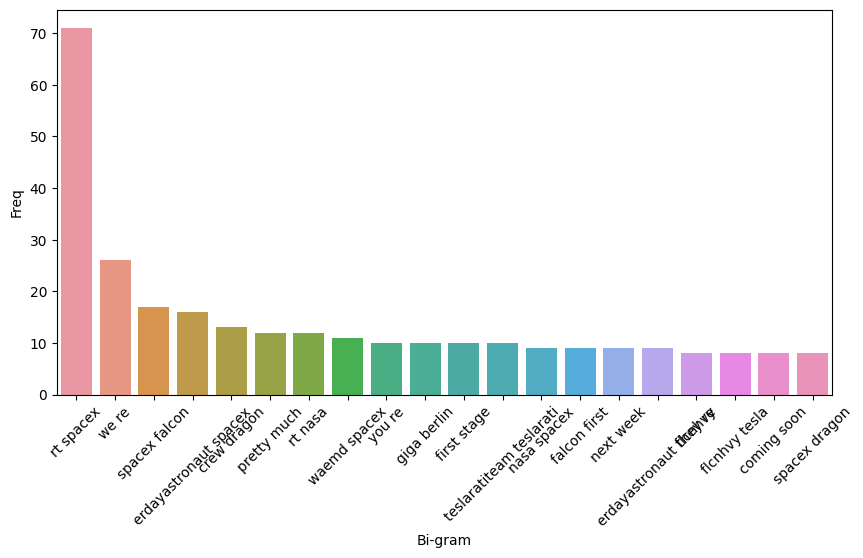

In [16]:
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])


***Tri-Gram***

In [17]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [18]:
top3_words = get_top_n3_words(EMTweet["Tweet"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head()

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7


[Text(0, 0, 'rt spacex falcon'),
 Text(1, 0, 'falcon first stage'),
 Text(2, 0, 'spacex falcon first'),
 Text(3, 0, 'thesheetztweetz waemd spacex'),
 Text(4, 0, 'course still love'),
 Text(5, 0, 'ppathole thesheetztweetz waemd'),
 Text(6, 0, 'waemd spacex spacexstarlink'),
 Text(7, 0, 'first stage landed'),
 Text(8, 0, 'rt spacex liftoff'),
 Text(9, 0, 'spacex spacexstarlink wanationalguard'),
 Text(10, 0, 'spacex felixschlang marcushousegame'),
 Text(11, 0, 'still love droneship'),
 Text(12, 0, 'rt spacex dragon'),
 Text(13, 0, 'dragon first operational'),
 Text(14, 0, 'first operational mission'),
 Text(15, 0, 'casparstanley ercxspace marcushousegame'),
 Text(16, 0, 'ercxspace marcushousegame felixschlang'),
 Text(17, 0, 'erdayastronaut joshbickett ajtourville'),
 Text(18, 0, 'joshbickett ajtourville spacex'),
 Text(19, 0, 'spacex falcon launches')]

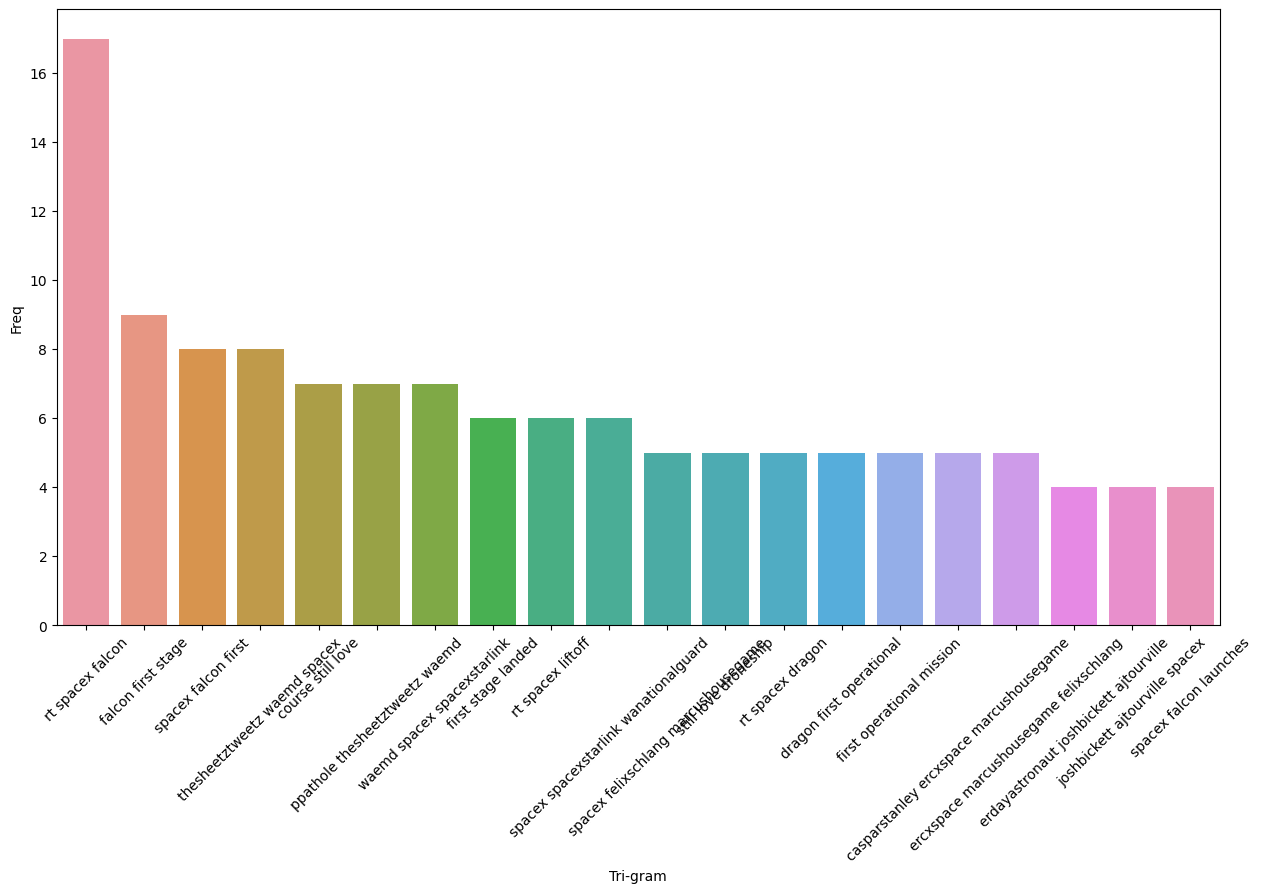

In [19]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (15, 8))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

**Word-Cloud**

In [20]:
from wordcloud import WordCloud

In [21]:
string_Total = " ".join(EMTweet["Tweet"])

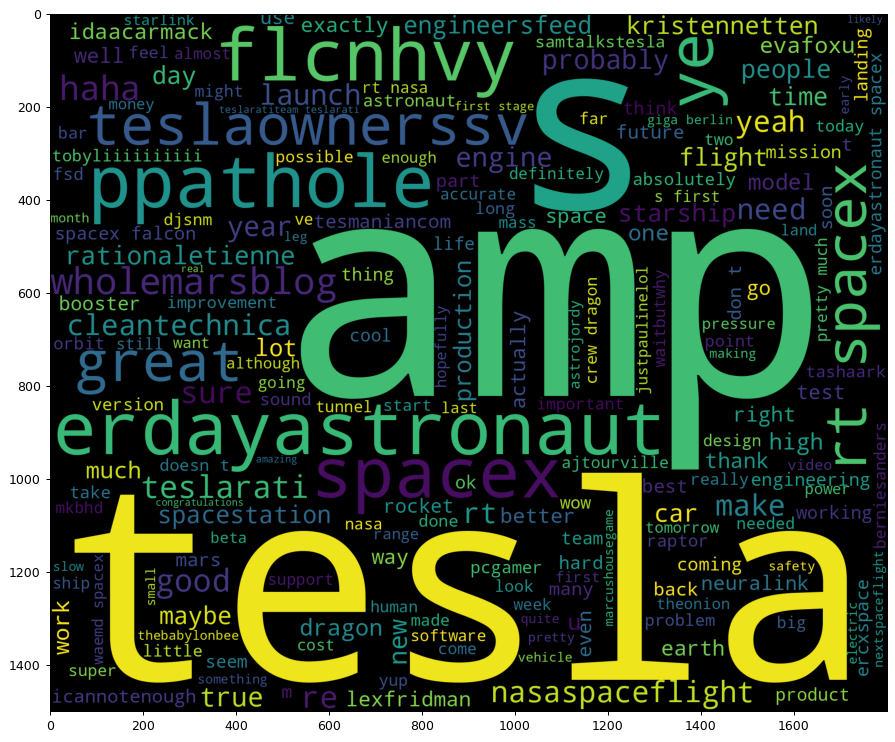

In [22]:
#wordcloud for entire corpus

wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.figure(figsize=(12,12),dpi=90)
plt.imshow(wordcloud_stw)

**Subjectivity and Polarity**

In [23]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Tweet"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
EMTweet[["subjectivity", "polarity"]] = EMTweet.apply(sentiment_analysis, axis=1)

EMTweet

,Tweet,subjectivity,polarity
0,im alien,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,0.508333,0.111111
1995,ppathole make sure read ur terms amp condition...,0.888889,0.500000
1996,teslagong ppathole samwise gamgee,0.000000,0.000000
1997,ppathole altho dumb dumber,0.500000,-0.375000


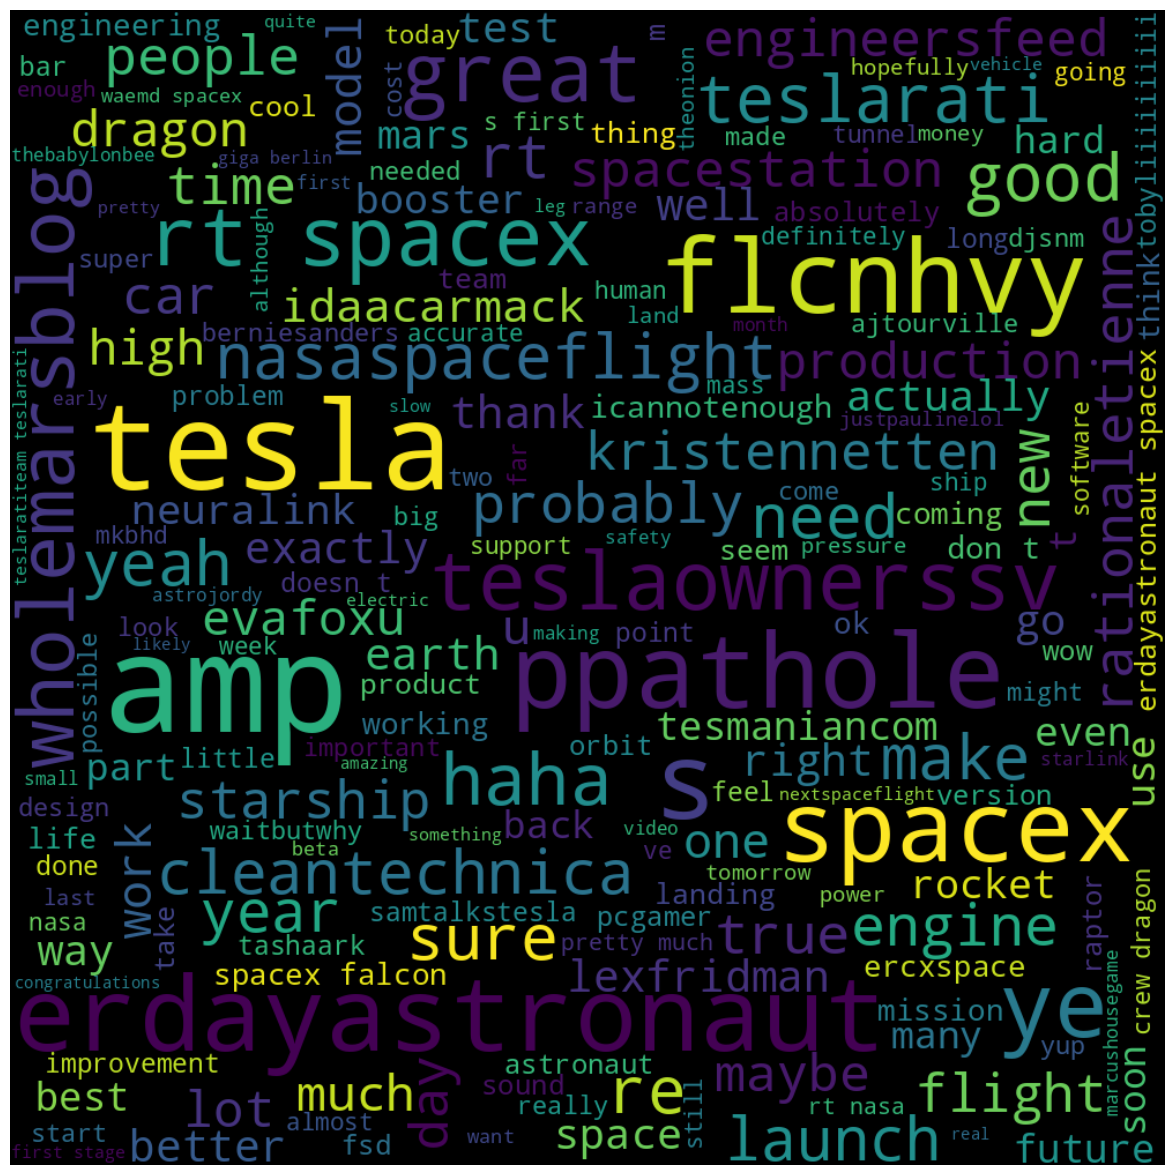

In [24]:
#Word-Cloud

allwords = " ".join([twts for twts in EMTweet["Tweet"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(15, 15), dpi=100)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [25]:
# Compute The Negative, Neutral, Positive Analysis

def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Create a New Analysis Column
EMTweet["analysis"] = EMTweet["polarity"].apply(analysis)

In [26]:
positive_tweets = EMTweet[EMTweet['analysis'] == 'Positive']
negative_tweets = EMTweet[EMTweet['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Tweet'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Tweet'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year


**Sentiment Analysis Graph**

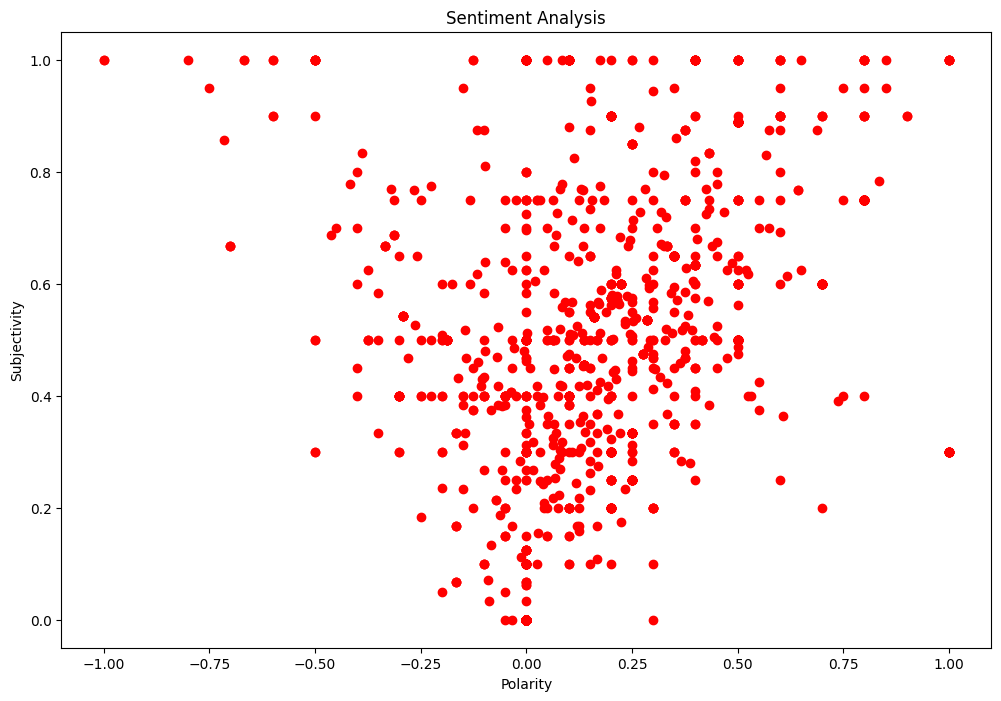

In [ ]:
plt.figure(figsize=(12, 8))

for i in range(0, EMTweet.shape[0]):
    plt.scatter(EMTweet["polarity"][i], EMTweet["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [27]:
len(positive_tweets) / len(negative_tweets)

4.21608040201005

**Interpretation**: Since Sentimen number is positive, and quite high of a ratio, we can also conclude that Elon Musk is a positive guy.